In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

#from tensorflow import keras
from keras.utils import to_categorical
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D
from keras.preprocessing import image
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras import layers

#### Splitting data into features and labels for test and training data

In [2]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('test.csv')
print(test.shape)

(28000, 784)


In [4]:
X_train = train.iloc[:,1:].values.astype('float32')
y_train = train.iloc[:,0].values.astype('int32')
X_test = test.values.astype('float32')

In [5]:
X_train.shape

(42000, 784)

#### Plotting the data

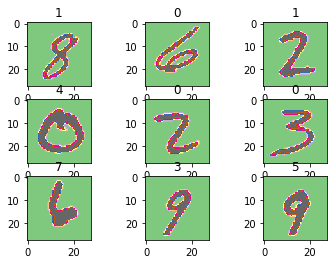

In [6]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(0, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i+20],cmap=plt.get_cmap('Accent'))
    plt.title(y_train[i]);

#### Reshape the data to add a color 

In [7]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

#### Standartize the data

In [8]:
mean_px = np.mean(X_train).astype('float32')
std_px = np.std(X_train).astype('float32')

def standartize(x):
    return (x - mean_px)/std_px

##### One-hot encoding of labels

In [9]:
y_train = to_categorical(y_train)

/root/anaconda3/envs/rpz/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


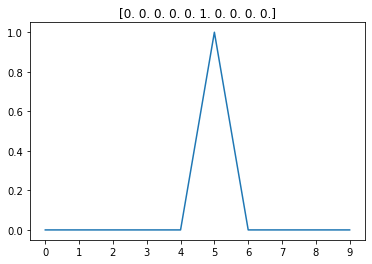

In [10]:
plt.plot(y_train[19])
plt.xticks(range(0,10))
plt.title(y_train[19])
plt.show()

### Creating the Linear Neural Network

In [11]:
np.random.seed(12)

In [12]:
model = Sequential()
model.add(Lambda(standartize,input_shape = (28,28,1)))
model.add(Flatten())
model.add(Dense(10,activation = 'softmax'))

In [13]:
print(model.input_shape)
print(model.output_shape)

(None, 28, 28, 1)
(None, 10)


##### Optimizing

In [14]:
model.compile(optimizer = RMSprop(lr = 0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [15]:
gen = image.ImageDataGenerator()

#### Cross-validation

In [16]:
y_train.shape

(42000, 10)

In [17]:
X = X_train
y = y_train
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.10, random_state=12)
batches = gen.flow(X_train,y_train,batch_size=64)
val_batches = gen.flow(X_val,y_val,batch_size=64)

## Still didn't use Standartize function and apply Neural Network to our model 

In [18]:
history = model.fit_generator(generator = batches, steps_per_epoch=len(X_train)//len(batches),\
                              epochs=3,validation_data=val_batches,validation_steps=len(X_val)//len(val_batches))

/root/anaconda3/envs/rpz/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
63/63 [==============================] - 3s 34ms/step - loss: 1.5539 - accuracy: 0.4935 - val_loss: 0.6036 - val_accuracy: 0.8162
Epoch 2/3
63/63 [==============================] - 1s 9ms/step - loss: 0.5299 - accuracy: 0.8406 - val_loss: 0.4507 - val_accuracy: 0.8633
Epoch 3/3
63/63 [==============================] - 1s 9ms/step - loss: 0.4383 - accuracy: 0.8667 - val_loss: 0.3821 - val_accuracy: 0.8874


In [19]:
history = history.history

In [20]:
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

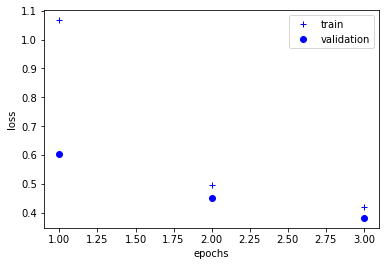

In [21]:
#history['loss']
epochs = range(1,1+len(history['loss']))
plt.plot(epochs,history['loss'],'b+')
plt.plot(epochs,history['val_loss'],'bo')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

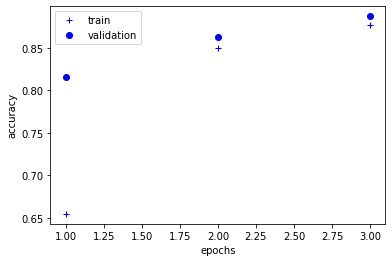

In [22]:
epochs = range(1,1+len(history['accuracy']))
plt.plot(epochs,history['accuracy'],'b+')
plt.plot(epochs,history['val_accuracy'],'bo')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'])
plt.show()

### Fully Connected Layer

In [26]:
def get_model():
    model = Sequential([
        layers.Lambda(standartize,input_shape = (28,28,1)),
        layers.Flatten(),
        layers.Dense(512,activation = 'relu'),
        layers.Dense(10,activation = 'softmax'),
    ])
    model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
    return model

In [27]:
fc = get_model()
fc.optimizer.lr = 0.01

In [28]:
full_history = model.fit_generator(generator = batches, steps_per_epoch=len(X_train)//len(batches),\
                              epochs=3,validation_data=val_batches,validation_steps=len(X_val)//len(val_batches))

Epoch 1/3
63/63 [==============================] - 1s 8ms/step - loss: 0.4169 - accuracy: 0.8862 - val_loss: 0.3578 - val_accuracy: 0.8921
Epoch 2/3
63/63 [==============================] - 0s 8ms/step - loss: 0.3742 - accuracy: 0.8924 - val_loss: 0.3483 - val_accuracy: 0.8963
Epoch 3/3
63/63 [==============================] - 0s 8ms/step - loss: 0.3479 - accuracy: 0.8971 - val_loss: 0.3282 - val_accuracy: 0.9095


In [29]:
full_history = full_history.history

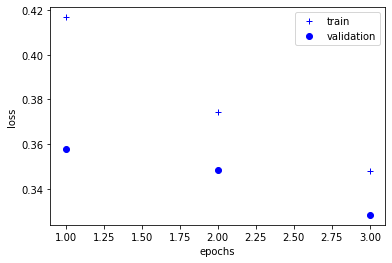

In [30]:
epochs = range(1,1+len(full_history['loss']))
plt.plot(epochs,full_history['loss'],'b+')
plt.plot(epochs,full_history['val_loss'],'bo')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

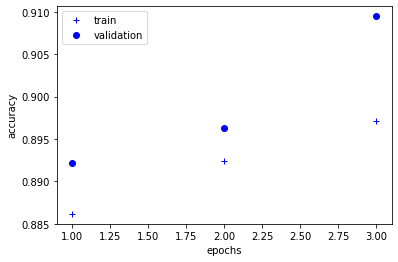

In [31]:
epochs = range(1,1+len(full_history['accuracy']))
plt.plot(epochs,full_history['accuracy'],'b+')
plt.plot(epochs,full_history['val_accuracy'],'bo')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'])
plt.show()

### Convolutional Neural Network

In [32]:
def conv_model():
    model = Sequential([
        layers.Lambda(standartize,input_shape = (28,28,1)),
        layers.Conv2D(32,(3,3),activation = 'relu'),
        layers.Conv2D(32,(3,3),activation='relu'),
        layers.MaxPool2D(),
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dense(512,activation = 'relu'),
        layers.Dense(10,activation = 'softmax'),
    ])
    model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
    return model

In [33]:
conv = conv_model()
conv.optimizer.lr = 0.01

In [34]:
conv_history = conv.fit_generator(generator = batches, steps_per_epoch=len(X_train)//len(batches),\
                              epochs=3,validation_data=val_batches,validation_steps=len(X_val)//len(val_batches))

Epoch 1/3
63/63 [==============================] - 11s 170ms/step - loss: 2.1171 - accuracy: 0.3628 - val_loss: 0.3817 - val_accuracy: 0.8735
Epoch 2/3
63/63 [==============================] - 10s 153ms/step - loss: 0.3238 - accuracy: 0.8982 - val_loss: 0.2245 - val_accuracy: 0.9286
Epoch 3/3
63/63 [==============================] - 10s 165ms/step - loss: 0.2433 - accuracy: 0.9232 - val_loss: 0.1776 - val_accuracy: 0.9444


In [35]:
full_conv_history = conv_history.history

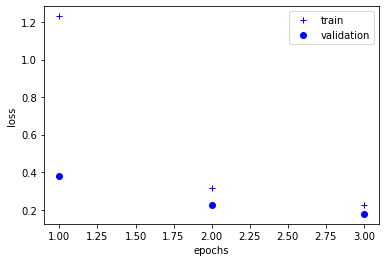

In [36]:
epochs = range(1,1+len(full_conv_history['loss']))
plt.plot(epochs,full_conv_history['loss'],'b+')
plt.plot(epochs,full_conv_history['val_loss'],'bo')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

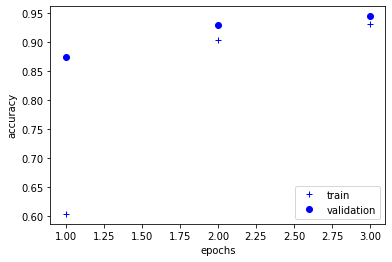

In [37]:
epochs = range(1,1+len(full_conv_history['accuracy']))
plt.plot(epochs,full_conv_history['accuracy'],'b+')
plt.plot(epochs,full_conv_history['val_accuracy'],'bo')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'])
plt.show()

### Data Augmentation

In [38]:
gen =image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train,y_train,batch_size=64)
val_batches = gen.flow(X_val,y_val,batch_size=64)

In [40]:
conv_history = conv.fit_generator(generator = batches, steps_per_epoch=len(X_train)//len(batches),\
                              epochs=1,validation_data=val_batches,validation_steps=len(X_val)//len(val_batches))

63/63 [==============================] - 11s 169ms/step - loss: 0.2808 - accuracy: 0.9122 - val_loss: 0.2597 - val_accuracy: 0.9172


### Batch Normalization

In [44]:
def conv_batchnorm_model():
    model = Sequential([
        layers.Lambda(standartize,input_shape = (28,28,1)),
        layers.BatchNormalization(axis=1),
        layers.Conv2D(32,(3,3),activation = 'relu'),
        layers.BatchNormalization(axis=1),
        layers.Conv2D(32,(3,3),activation='relu'),
        layers.MaxPool2D(),
        layers.BatchNormalization(axis=1),
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.BatchNormalization(axis=1),
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dense(512,activation = 'relu'),
        layers.BatchNormalization(),
        layers.Dense(10,activation = 'softmax'),
    ])
    model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
    return model

In [49]:
conv_batch = conv_batchnorm_model()
conv_batch.optimizer.lr = 0.005
conv_history = conv_batch.fit_generator(generator = batches, steps_per_epoch=len(X_train)//len(batches),\
                              epochs=1,validation_data=val_batches,validation_steps=len(X_val)//len(val_batches))

63/63 [==============================] - 16s 241ms/step - loss: 1.0746 - accuracy: 0.7206 - val_loss: 0.7083 - val_accuracy: 0.8152


In [50]:
conv_batch.optimizer.lr = 0.005
gen =image.ImageDataGenerator()
batches = gen.flow(X,y,batch_size=64)
batch_history = conv_batch.fit_generator(generator = batches, steps_per_epoch = batches.n, epochs =3)

Epoch 1/3
  551/42000 [..............................] - ETA: 2:11:45 - loss: 0.0896 - accuracy: 0.9733

KeyboardInterrupt: 

In [ ]:
predictions = batch_history.predict_classes(X_test,verbose=0)
submissions = pd.DataFrame({'ImageId':list(range(1,len(predictions)+1)),'Label':predictions})
submissions.to_csv('DR.csv',index = False, header = True)